## Project on Cars selling price prediction in relation to other features.
Using two models to test the prediction of selling price of cars over the years and see which of the model perform better.
* Linear Regression model.
* Logistic Regression model.

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv(r'C:\Users\Patiencenne\Desktop\Project portfolio datasets\archive (2)\Car details v3.csv')

In [9]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0


In [10]:
df = df.drop(['name', 'seller_type', 'owner',], axis = 1)

In [11]:
df.head(2)

,year,selling_price,km_driven,fuel,transmission,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Manual,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,120000,Diesel,Manual,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   transmission   8128 non-null   object 
 5   mileage        7907 non-null   object 
 6   engine         7907 non-null   object 
 7   max_power      7913 non-null   object 
 8   torque         7906 non-null   object 
 9   seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 635.1+ KB


In [13]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


## Exploratory Data analysis (EDA)

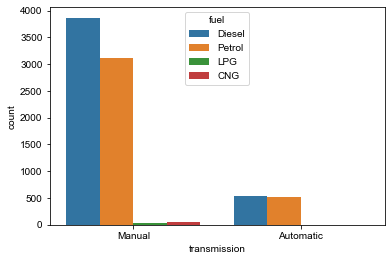

In [14]:
sns.countplot(x = 'transmission', hue = 'fuel', data = df)
sns.set_style('darkgrid')

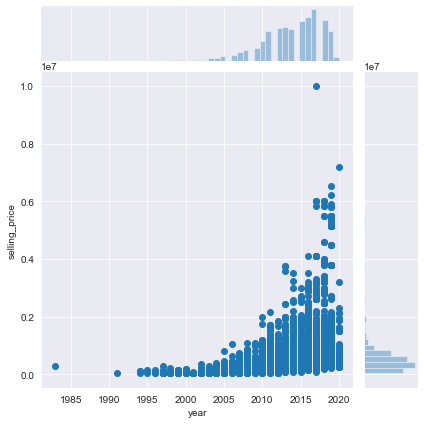

In [15]:
sns.jointplot(x = 'year', y = 'selling_price', data = df)

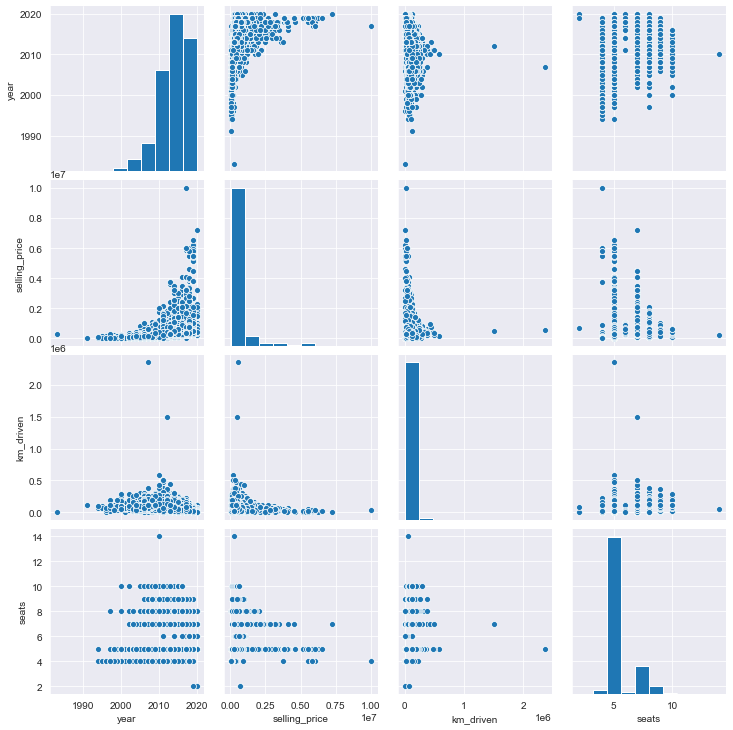

In [16]:
sns.pairplot(df)

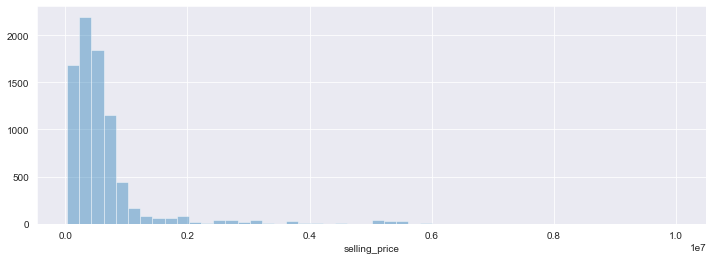

In [17]:
plt.figure(figsize = (12, 4))
sns.distplot(df['selling_price'], kde = False, bins = 50)

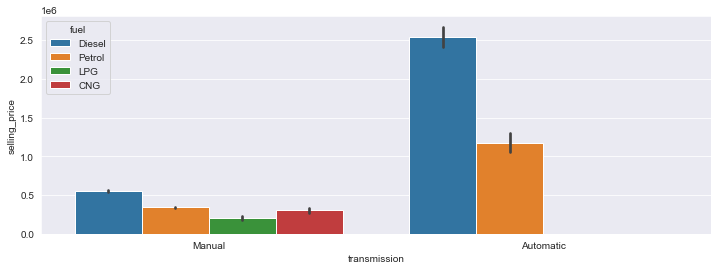

In [18]:
plt.figure(figsize = (12, 4))
sns.barplot(x = 'transmission', y = 'selling_price', hue = 'fuel', data = df)

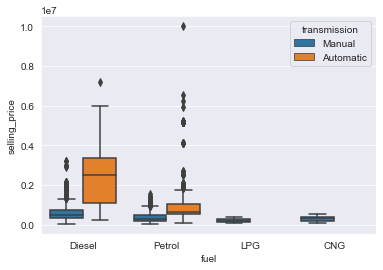

In [19]:
sns.boxplot(x = 'fuel', y = 'selling_price', hue = 'transmission', data = df)

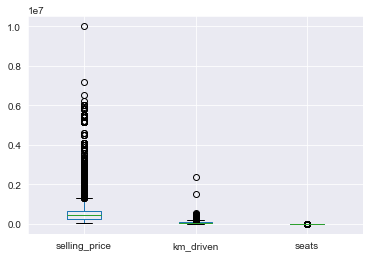

In [20]:
df[['selling_price', 'km_driven', 'seats']].plot.box()

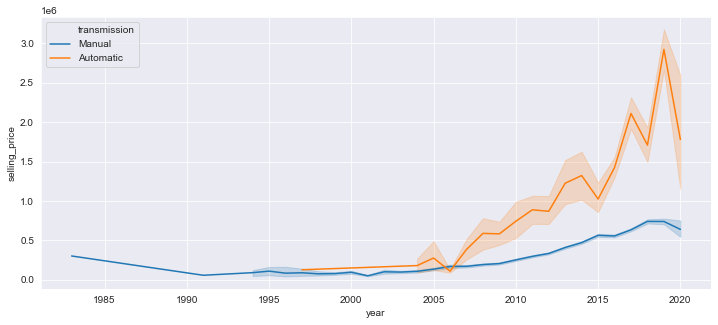

In [21]:
plt.figure(figsize = (12, 5))
sns.lineplot(x = 'year', y = 'selling_price', hue = 'transmission', data = df)

## Data Cleaning

In [22]:
df.mileage = df.mileage.str.split(' ', expand = True)[0].astype(float)

In [23]:
df.engine = df.engine.str.split(' ', expand = True)[0].astype(float)

In [24]:
df.max_power = df.max_power.str.split(' ', expand = True)[0]

In [25]:
df.max_power = pd.to_numeric(df.max_power)

In [26]:
def clean_value(value):
    if value == np.nan:
        return 0
    res  = 0
    match = re.match(r'^(\d+\.?\d+).*$', str(value))
    if match is not None:
        res  = np.float64(match[1])
    return res

In [27]:
df.torque = df.torque.apply(clean_value)

In [28]:
df.head(2)

,year,selling_price,km_driven,fuel,transmission,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Manual,23.40,1248.0,74.00,190.0,5.0
1,2014,370000,120000,Diesel,Manual,21.14,1498.0,103.52,250.0,5.0


In [29]:
df[['mileage', 'engine', 'max_power', 'torque']].describe()

,mileage,engine,max_power,torque
count,7907.000000,7907.000000,7912.000000,8128.000000
mean,19.418783,1458.625016,91.517919,163.696786
std,4.037145,503.916303,35.822499,99.819819
min,0.000000,624.000000,0.000000,0.000000
25%,16.780000,1197.000000,68.050000,96.100000
50%,19.300000,1248.000000,82.000000,150.000000
75%,22.320000,1582.000000,102.000000,200.000000
max,42.000000,3604.000000,400.000000,789.000000


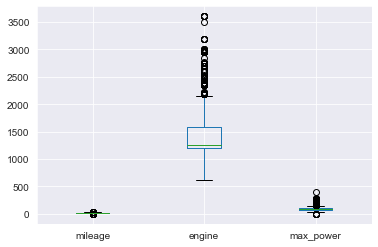

In [30]:
df[['mileage', 'engine', 'max_power']].plot.box()

In [31]:
df.corr()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats
year,1.000000,0.414092,-0.418006,0.329145,0.018848,0.226320,0.335200,-0.009144
selling_price,0.414092,1.000000,-0.225534,-0.126054,0.455734,0.748489,0.616552,0.041358
km_driven,-0.418006,-0.225534,1.000000,-0.173073,0.205914,-0.038075,-0.021465,0.227336
mileage,0.329145,-0.126054,-0.173073,1.000000,-0.575831,-0.374621,-0.170577,-0.452085
engine,0.018848,0.455734,0.205914,-0.575831,1.000000,0.703975,0.628970,0.610309
max_power,0.226320,0.748489,-0.038075,-0.374621,0.703975,1.000000,0.770776,0.191999
torque,0.335200,0.616552,-0.021465,-0.170577,0.628970,0.770776,1.000000,0.273703
seats,-0.009144,0.041358,0.227336,-0.452085,0.610309,0.191999,0.273703,1.000000


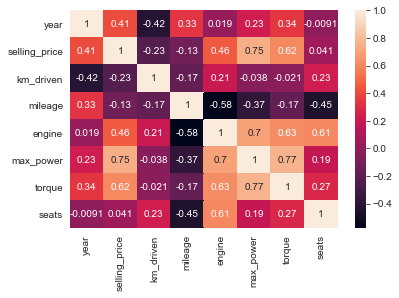

In [32]:
sns.heatmap(df.corr(), annot = True)

In [33]:
Fuel = pd.get_dummies(df.fuel)

In [34]:
Fuel.head()

,CNG,Diesel,LPG,Petrol
0,0,1,0,0
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,0,0,1


In [35]:
Year = pd.get_dummies(df.year)

In [36]:
Year.head(2)

,1983,1991,1994,1995,1996,1997,1998,1999,2000,2001,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [37]:
df = pd.concat([df, Fuel, Year], axis = 1)

In [38]:
Transmission = {'Automatic': 0,
               'Manual': 1}
df['transmission'] = df.transmission.map(Transmission)

In [39]:
df.head(2)

,year,selling_price,km_driven,fuel,transmission,mileage,engine,max_power,torque,seats,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,2014,450000,145500,Diesel,1,23.40,1248.0,74.00,190.0,5.0,...,0,0,0,1,0,0,0,0,0,0
1,2014,370000,120000,Diesel,1,21.14,1498.0,103.52,250.0,5.0,...,0,0,0,1,0,0,0,0,0,0


In [40]:
df = df.drop(['year', 'fuel'], axis = 1)

In [41]:
df.head(2)

,selling_price,km_driven,transmission,mileage,engine,max_power,torque,seats,CNG,Diesel,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,450000,145500,1,23.40,1248.0,74.00,190.0,5.0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,370000,120000,1,21.14,1498.0,103.52,250.0,5.0,0,1,...,0,0,0,1,0,0,0,0,0,0


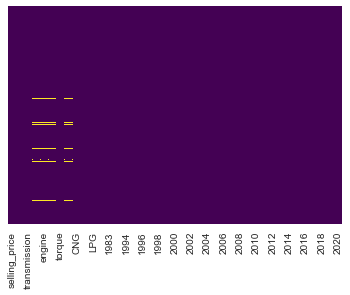

In [42]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [43]:
df.isnull().sum().head(9)

selling_price      0
km_driven          0
transmission       0
mileage          221
engine           221
max_power        216
torque             0
seats            221
CNG                0
dtype: int64

## Dealing with missing values

In [44]:
df.mileage.fillna(value = np.round(df.mileage.mean(), decimals = 2), inplace = True)

In [45]:
df.engine.fillna(value = np.round(df.engine.median(), decimals = 2), inplace = True)

In [46]:
df.max_power.fillna(value = np.round(df.max_power.median(), decimals = 2), inplace = True)

In [47]:
df.seats.fillna(method = 'bfill', inplace = True)

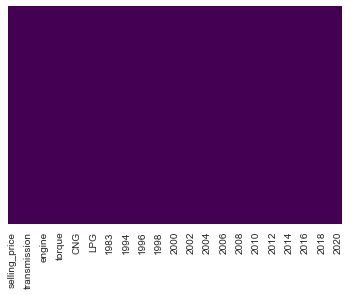

In [48]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

## Normalizing the df data with StandardScaler

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scale = StandardScaler()

In [51]:
df1 = scale.fit_transform(df.drop('selling_price', axis = 1))

## Using Principal Component Analysis (PCA) to reduce the dimension of the df data after using StandardScaler to normalized it to df1 data.

In [52]:
from sklearn.decomposition import PCA

In [53]:
pca = PCA(n_components= 40)

In [54]:
x_pca = pca.fit_transform(df1)

In [55]:
X = x_pca
y = df.selling_price

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Using Linear Regression model to predict the selling_price

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lm = LinearRegression()

In [60]:
lm.fit(X_train, y_train)

LinearRegression()

In [61]:
print(lm.intercept_)

639748.9147254034


In [62]:
lm.coef_

array([ 2.16581597e+05, -3.31924331e+05, -2.46295171e+04,  6.32422570e+04,
       -1.79542772e+04, -6.17090683e+03, -1.82750503e+04, -4.37866761e+04,
        5.86680270e+03,  9.13953473e+03, -2.10503587e+02,  4.04218987e+03,
       -1.32327311e+04,  4.50444067e+01, -2.38475003e+04, -2.74420623e+04,
        1.20829789e+04,  1.22641893e+04,  8.43023677e+03, -2.21846819e+03,
       -3.36136781e+03, -8.30927000e+03,  5.02467262e+02,  3.15629788e+03,
       -2.11128563e+03,  1.37402822e+03,  1.20153015e+03, -2.15822949e+03,
        3.63572809e+03,  2.79393197e+04,  7.17644401e+04, -3.01970792e+04,
        2.60258672e+04,  5.43527553e+04,  1.32503270e+05,  6.64311243e+04,
       -8.43808228e+04, -1.68646993e+05,  6.31796190e+18, -1.26164568e+18])

## Prediction of the selling_price

In [63]:
prediction = lm.predict(X_test)

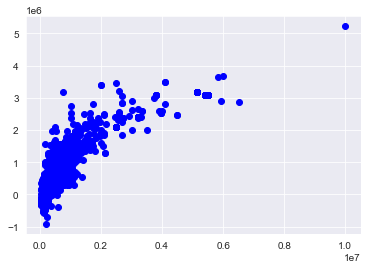

In [64]:
plt.scatter(y_test, prediction, c = 'b')

## Residual
The difference between the y_test and the prediction (y_test - prediction)

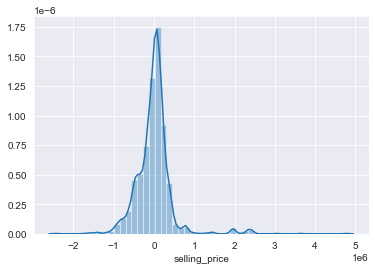

In [65]:
sns.distplot(y_test - prediction)

## Evaluation of Linear Regression model on its performance of the prediction of selling_price.

In [66]:
from sklearn import metrics

In [67]:
metrics.mean_absolute_error(y_test, prediction)

276023.77276065026

In [68]:
metrics.mean_squared_error(y_test, prediction)

205643298725.71658

In [69]:
np.sqrt(metrics.mean_squared_error(y_test, prediction))

453479.1050596671

## Average error ratio

In [70]:
# Mean Absolute percentage error
print('The percentage difference from actual value and predicted value of Linear Regression model: ',((abs(y_test - prediction) / df.selling_price).sum() / len(df.selling_price)) * 100)

The percentage difference from actual value and predicted value of Linear Regression model:  20.555951581614178


## Using Logistic Regression model to predict the selling_price

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
lr = LogisticRegression()

In [73]:
lr.fit(X_train, y_train)

C:\Users\Patiencenne\Anaconda3\Anaconda Distribution\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Prediction

In [74]:
preds = lr.predict(X_test)

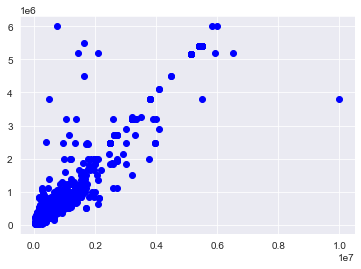

In [75]:
plt.scatter(y_test, preds, c = 'b')

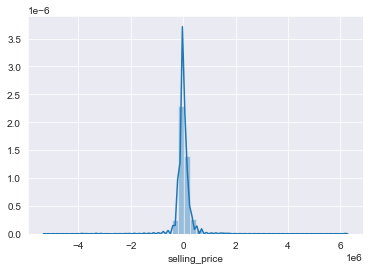

In [76]:
sns.distplot(y_test - preds)

## Evaluation of the Logistic Regression model on its performance of the prediction of the selling_price

In [77]:
from sklearn import metrics

In [78]:
metrics.mean_absolute_error(y_test, preds)

143113.74497744977

In [79]:
metrics.mean_squared_error(y_test, preds)

103982989909.03976

In [80]:
np.sqrt(metrics.mean_squared_error(y_test, preds))

322463.9358270003

## Average error ratio

In [81]:
# Mean Absolute percentage error
print('The percentage difference from actual value and predicted value of Logistic Regression model: ',((abs(y_test - preds) / df.selling_price).sum() / len(df.selling_price)) * 100)

The percentage difference from actual value and predicted value of Logistic Regression model:  9.20369665464948


## In conclusion.
    The Linear Regression model did not perform well enough, even though, it showed a bit of linear relationship between the True value (y_test) and the predicted value (prediction) clustering around 0.2 on the x-axis and 0.2 y-axis. Also, stretching out without showing clear relationship between the True value and the predicted value, as well as the Mean Absolute error (MAE) = 276023.77, with an average error ratio = 20.56% which is higher than that of the Logistic Regression model Mean Absolute error (MAE) = 143113.75 with an with an average error ratio = 9.20%, i.e the Logistic Regression model did better because the MAE is minimal and it showed that there was a linear relationship between the True value and the predicted value as a result of the straight line.
    
    Average error ratio is used, because the True value (selling_price) has large variance and high values which can skew the error difference with the predicted values. Also, since the mean absolute error is not affected by outliers compared to the mean squared error and root mean squared error. Furthermore, adjust the outliers in order to minimize the errors using floor and capping interquartile range method.